In [2]:
import pandas as pd
from scipy import stats

In [3]:
df = pd.read_csv('../df_extended_v2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3869 entries, 0 to 3868
Columns: 108 entries, Unnamed: 0 to vj72.2h
dtypes: float64(3), int64(84), object(21)
memory usage: 3.2+ MB


In [4]:
no_middle = df[df.education_level == 0]
middle = df[df.education_level == 1]
tech = df[df.education_level == 2]
high = df[df.education_level == 3]


Искл асперантуру и ординатуру тк в нашем датасете их мало и edu level == 4 нет

'vj72.6h2', 'vj72.6h', 'vj72.5h4', 'vj72.5h3', 'vj72.5h2', 'vj72.5h', 'vj72.4h2', 'vj72.4h', 'vj72.3h2', 'vj72.3h', 'vj72.2h2', 'vj72.2h'

In [5]:
no_middle["is_remote"] = (no_middle["vj72.2h2"] == "Нет") | (
    no_middle["vj72.2h"] == "Нет"
)
no_middle.is_remote.value_counts()

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_45353/2671501654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_middle["is_remote"] = (no_middle["vj72.2h2"] == "Нет") | (


is_remote
False    319
True       2
Name: count, dtype: int64

In [6]:
middle["is_remote"] = (middle["vj72.3h"] == "Нет") | (
    middle["vj72.3h2"] == "Нет"
)
middle.is_remote.value_counts()

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_45353/2775914171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle["is_remote"] = (middle["vj72.3h"] == "Нет") | (


is_remote
False    1095
True        8
Name: count, dtype: int64

In [7]:
tech["is_remote"] = (tech["vj72.5h2"] == "Нет") | (
    tech["vj72.5h2"] == "Нет"
)
tech.is_remote.value_counts()

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_45353/3594806925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech["is_remote"] = (tech["vj72.5h2"] == "Нет") | (


is_remote
False    1057
True        6
Name: count, dtype: int64

In [8]:
high["is_remote"] = (
    (high["vj72.5h4"] == "Нет")
    | (high["vj72.5h3"] == "Нет")
    | (high["vj72.5h2"] == "Нет")
    | (high["vj72.5h"] == "Нет")
)
high.is_remote.value_counts()

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_45353/1537738312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high["is_remote"] = (


is_remote
False    799
True     583
Name: count, dtype: int64

In [9]:
high[high.is_remote == True].log_wage.median(), high[high.is_remote == False].log_wage.median()  

(10.05359, 10.05359)

In [10]:
stats.mannwhitneyu(high[high.is_remote == True].log_wage, high[high.is_remote == False].log_wage)

MannwhitneyuResult(statistic=231209.0, pvalue=0.8164593714545441)

<Axes: >

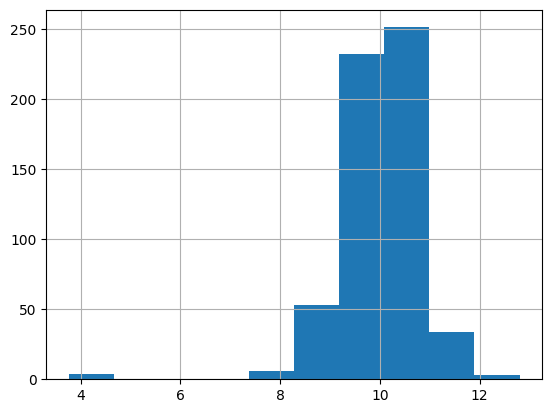

In [11]:
high[high.is_remote == True].log_wage.hist()

In [12]:
high[high.is_remote == True].age.max()

59

<Axes: >

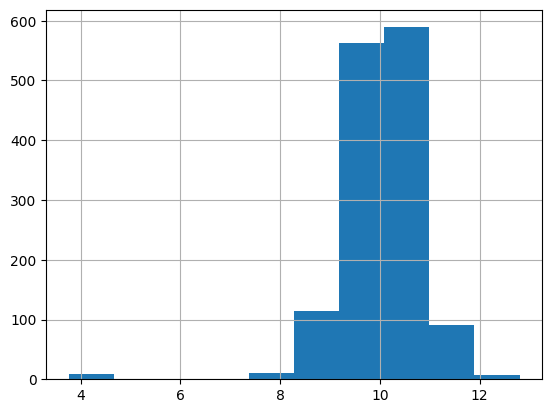

In [13]:
high['log_wage'].hist()

In [14]:
stats.shapiro(high.log_wage)

ShapiroResult(statistic=0.8312497138977051, pvalue=7.148296372199416e-36)

In [15]:
df.to_csv("df_extended_v2_remote.csv")